In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import matplotlib.pyplot as plt
import seaborn           as sns
import plotly.graph_objs as go
import plotly.express    as px 
import nltk
import re
import string

from scipy.stats import norm
from wordcloud   import WordCloud, STOPWORDS

import warnings
warnings.filterwarnings("ignore")
from wordcloud import WordCloud,STOPWORDS
stopwords = set(STOPWORDS)

from textblob import TextBlob
import re
from collections import Counter

from sklearn.metrics import classification_report,accuracy_score,confusion_matrix
from IPython.display import Markdown as md


import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [2]:
tweets = pd.read_csv("/content/drive/MyDrive/pfizer_tweet/visualisasi/vaccination_tweets.csv")

In [3]:
tweets.head()

,id,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,retweets,favorites,is_retweet
0,1340539111971516416,Rachel Roh,"La Crescenta-Montrose, CA",Aggregator of Asian American news; scanning di...,2009-04-08 17:52:46,405,1692,3247,False,2020-12-20 06:06:44,Same folks said daikon paste could treat a cyt...,['PfizerBioNTech'],Twitter for Android,0,0,False
1,1338158543359250433,Albert Fong,"San Francisco, CA","Marketing dude, tech geek, heavy metal & '80s ...",2009-09-21 15:27:30,834,666,178,False,2020-12-13 16:27:13,While the world has been on the wrong side of ...,NaN,Twitter Web App,1,1,False
2,1337858199140118533,eli🇱🇹🇪🇺👌,Your Bed,"heil, hydra 🖐☺",2020-06-25 23:30:28,10,88,155,False,2020-12-12 20:33:45,#coronavirus #SputnikV #AstraZeneca #PfizerBio...,"['coronavirus', 'SputnikV', 'AstraZeneca', 'Pf...",Twitter for Android,0,0,False
3,1337855739918835717,Charles Adler,"Vancouver, BC - Canada","Hosting ""CharlesAdlerTonight"" Global News Radi...",2008-09-10 11:28:53,49165,3933,21853,True,2020-12-12 20:23:59,"Facts are immutable, Senator, even when you're...",NaN,Twitter Web App,446,2129,False
4,1337854064604966912,Citizen News Channel,NaN,Citizen News Channel bringing you an alternati...,2020-04-23 17:58:42,152,580,1473,False,2020-12-12 20:17:19,Explain to me again why we need a vaccine @Bor...,"['whereareallthesickpeople', 'PfizerBioNTech']",Twitter for iPhone,0,0,False


In [4]:
tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3082 entries, 0 to 3081
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   id                3082 non-null   int64 
 1   user_name         3082 non-null   object
 2   user_location     2437 non-null   object
 3   user_description  2902 non-null   object
 4   user_created      3082 non-null   object
 5   user_followers    3082 non-null   int64 
 6   user_friends      3082 non-null   int64 
 7   user_favourites   3082 non-null   int64 
 8   user_verified     3082 non-null   bool  
 9   date              3082 non-null   object
 10  text              3082 non-null   object
 11  hashtags          2283 non-null   object
 12  source            3081 non-null   object
 13  retweets          3082 non-null   int64 
 14  favorites         3082 non-null   int64 
 15  is_retweet        3082 non-null   bool  
dtypes: bool(2), int64(6), object(8)
memory usage: 343.2+ KB


In [5]:
tweets.describe()

,id,user_followers,user_friends,user_favourites,retweets,favorites
count,3.082000e+03,3.082000e+03,3082.000000,3082.000000,3082.000000,3082.000000
mean,1.343015e+18,5.493799e+04,1159.111940,14298.308566,1.717716,11.376703
std,3.371612e+15,4.335231e+05,2385.602273,44267.025221,12.243584,75.841003
min,1.337728e+18,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,1.339899e+18,1.162500e+02,165.250000,365.250000,0.000000,0.000000
50%,1.342506e+18,5.685000e+02,460.000000,1711.500000,0.000000,1.000000
75%,1.346373e+18,2.488250e+03,1194.000000,9744.500000,1.000000,5.000000
max,1.348554e+18,1.371493e+07,64441.000000,924667.000000,446.000000,2129.000000


In [6]:
#Number of rows and columns in the dataset
print("There are {} rows and {} columns in the dataset.".format(tweets.shape[0],tweets.shape[1]))

There are 3082 rows and 16 columns in the dataset.


WORD CLOUD

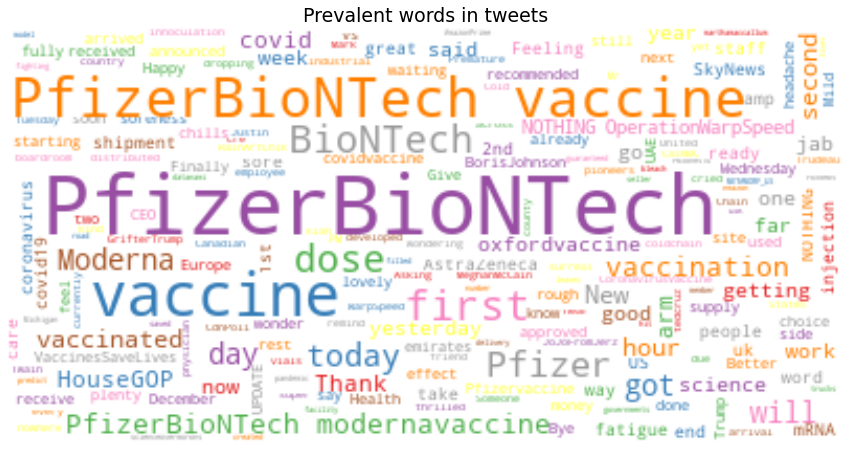

In [22]:
text = ",".join(review for review in tweets.text if 'COVID' not in review and 'https' not in review and 'Covid' not in review)
wordcloud = WordCloud(max_words=200, colormap='Set1',background_color="white").generate(text)
plt.figure(figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.figure(1,figsize=(12, 12))
plt.title('Prevalent words in tweets',fontsize=19)
plt.show()

Number of Tweets by location(Top 10)

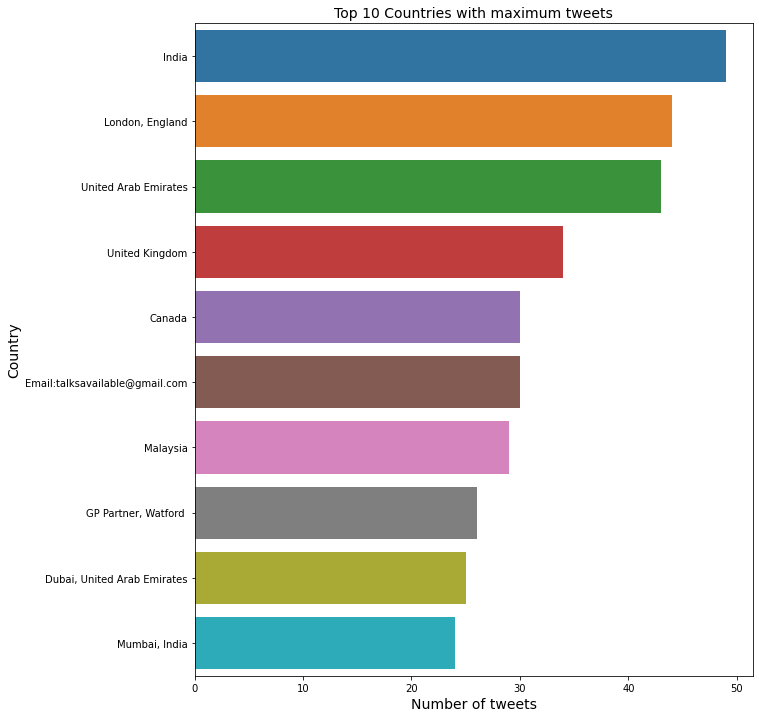

In [9]:
plt.figure(figsize=(10,12))
sns.barplot(tweets["user_location"].value_counts().values[0:10],
            tweets["user_location"].value_counts().index[0:10]);
plt.title("Top 10 Countries with maximum tweets",fontsize=14)
plt.xlabel("Number of tweets",fontsize=14)
plt.ylabel("Country",fontsize=14)
plt.show()

Bar plot of unique values in each column

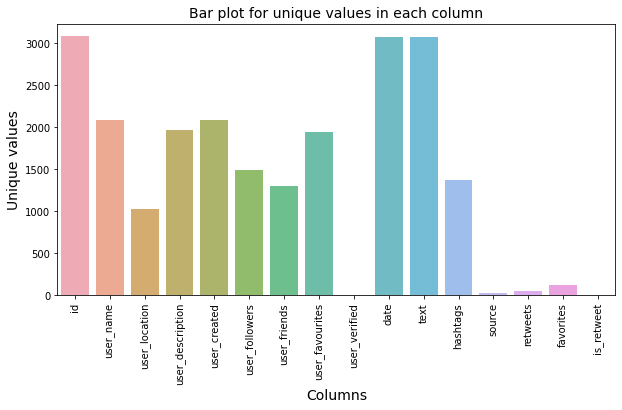

In [10]:
def unique_values_funct(data_frame):
    unique_dataframe = pd.DataFrame()
    unique_dataframe['Features'] = data_frame.columns
    uniques = []
    for col in data_frame.columns:
        u = data_frame[col].nunique()
        uniques.append(u)
    unique_dataframe['Uniques'] = uniques
    return unique_dataframe

udf = unique_values_funct(tweets)

f, ax = plt.subplots(1,1, figsize=(10,5))
sns.barplot(x=udf['Features'], y=udf['Uniques'], alpha=0.8)
plt.title('Bar plot for unique values in each column', fontsize=14)
plt.ylabel('Unique values', fontsize=14)
plt.xlabel('Columns', fontsize=14)
plt.xticks(rotation=90)
plt.show()

Plot verified users account

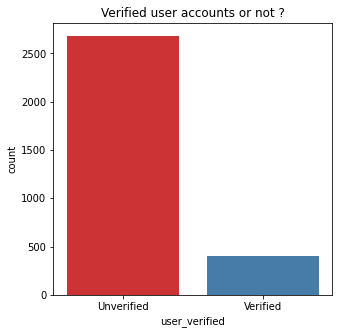

In [11]:
plt.figure(figsize=(5, 5))
sns.countplot(x ="user_verified",data=tweets, palette="Set1")
plt.title("Verified user accounts or not ?")
plt.xticks([False,True],['Unverified','Verified'])
plt.show()

Plot platform with maximum number of tweets

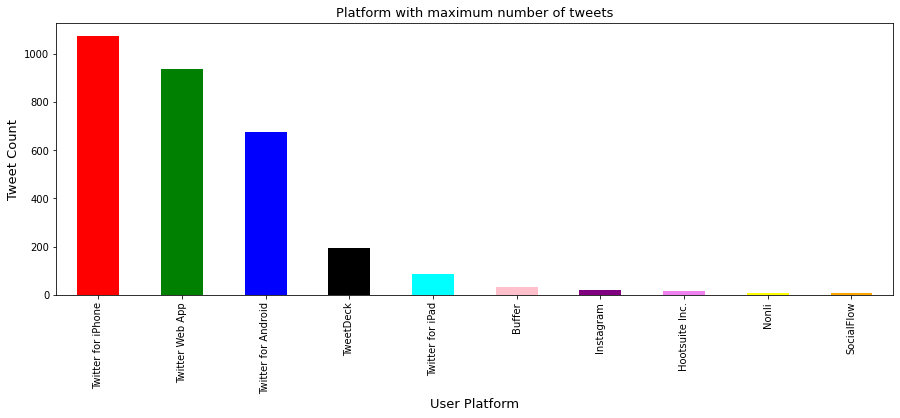

In [12]:
plt.figure(figsize=(15,5))
src = tweets['source'].value_counts().sort_values(ascending=False)
source = src.head(10)
source.plot.bar(color=['red', 'green', 'blue', 'black','cyan','pink','purple','violet','yellow','orange'])
plt.title('Platform with maximum number of tweets',size=13)
plt.xlabel('User Platform',size=13)
plt.ylabel('Tweet Count',size=13)
plt.show()

Top Hashtag

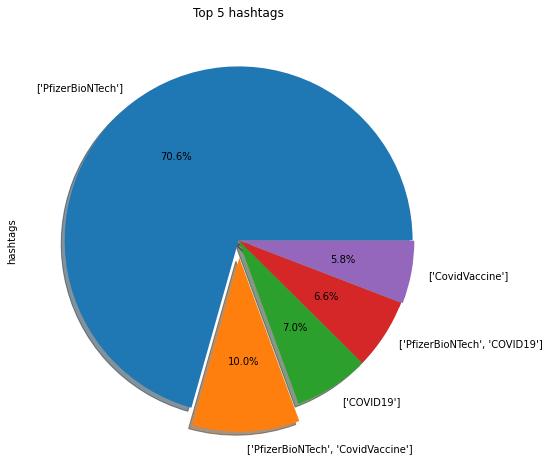

In [19]:
top_tags=tweets['hashtags'].value_counts().sort_values(ascending=False)
plt.figure(figsize=(8,8))
explode = (0, 0.1, 0, 0,0.01) 

top_tags[0:5].plot(kind = 'pie',title = 'Top 5 hashtags',autopct='%1.1f%%',shadow=True,explode = explode)

Top Tweet Day

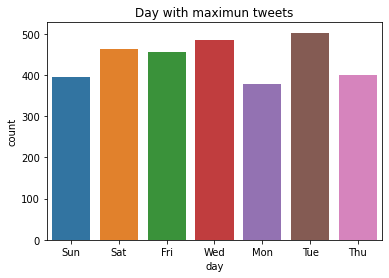

In [20]:
tweets["date"] = pd.to_datetime(tweets["date"])
tweets["Month"] = tweets["date"].apply(lambda x : x.month)
tweets["day"] = tweets["date"].apply(lambda x : x.dayofweek)
dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}
tweets["day"] = tweets["day"].map(dmap)
plt.title("Day with maximun tweets")
sns.countplot(tweets["day"])

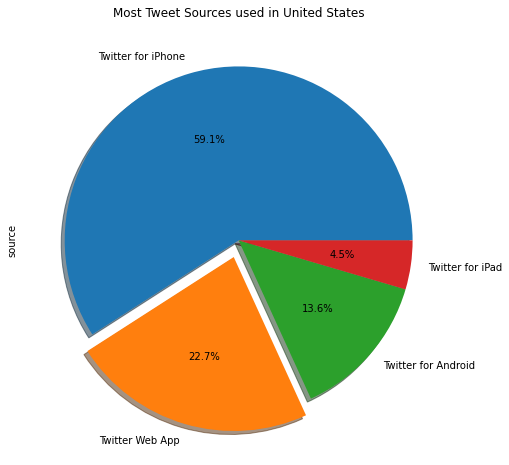

In [23]:
pla = tweets['source'][tweets['user_location'] == 'United States'].value_counts().sort_values(ascending=False)
explode = (0, 0.1, 0, 0) 
plt.figure(figsize=(8,8))
pla[0:4].plot(kind = 'pie', title = 'Most Tweet Sources used in United States', autopct='%1.1f%%',shadow=True,explode = explode)
plt.show()